In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ruta general
base_dir = 'Coleccion/'

#Sub rutas Modelos
m1 = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/'
m2 = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/'
m3 = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/'
m4 = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/'
m5 = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/'
m6 = base_dir + 'Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/'
m7 = base_dir + 'Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/'
m8 = base_dir + 'Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/'

ims = 'Imagenes/'

# Sub Rutas iluminacion + camara
c = ['Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/']

#cs = ['3', '4', '10', '11', '17', '18', '24', '25', '31', '32', '38', '39', '45', '46', '52', '53', '59', '60'] 

# Sub Rutas imagenes originales
i1 = 'Img_1/'
i2 = 'Img_2/'
i3 = 'Img_3/'
i4 = 'Img_4/'

# Almacenamiento de stacks
folder = 'FilteredStack1234Aug/'

mm = [m6, m7,m8]
ii = [i1, i2, i3, i4]

In [3]:
dictionary = {}
for m in mm:
    for z in c:
        for i in range(1, 501):
            key = m + ims + z + folder + 'FilteredStack1234Aug_M' + str(mm.index(m) + 6) + '_' + 'C' + str(c.index(z)+1) + '_' + str(i) + '.npy'
            value = m + 'PNA' + str(mm.index(m) + 6) + '/' + 'PN_' + str(i) + '.txt'
            dictionary[key] = value

In [27]:
numeros = [100, 200, 300, 400]
dictionary = {}
for m in mm:
    for z in c:
        for i in numeros:
            key = m + ims + z + folder + 'MinMax_M' + str(mm.index(m) + 1) + '_' + 'C' + str(c.index(z)+1) + '_' + str(i) + '.npy'
            value = m + 'PMinMax' + str(mm.index(m) + 1) + '/' + 'PMinMax_' + str(i) + '.txt'
            dictionary[key] = value

In [4]:
df = pd.DataFrame(list(dictionary.items()), columns=['stackURL', 'phaseURL'])
df.head()

,stackURL,phaseURL
0,Coleccion/Estructura_Vertical__Carga_Lineal_70...,Coleccion/Estructura_Vertical__Carga_Lineal_70...
1,Coleccion/Estructura_Vertical__Carga_Lineal_70...,Coleccion/Estructura_Vertical__Carga_Lineal_70...
2,Coleccion/Estructura_Vertical__Carga_Lineal_70...,Coleccion/Estructura_Vertical__Carga_Lineal_70...
3,Coleccion/Estructura_Vertical__Carga_Lineal_70...,Coleccion/Estructura_Vertical__Carga_Lineal_70...
4,Coleccion/Estructura_Vertical__Carga_Lineal_70...,Coleccion/Estructura_Vertical__Carga_Lineal_70...


In [5]:
len(df['stackURL'].unique())

27000

In [6]:
len(df['phaseURL'].unique())

1500

In [7]:
df['stackURL'][500]

'Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MZR_No_correccion/FilteredStack1234Aug/FilteredStack1234Aug_M6_C2_1.npy'

In [8]:
df['phaseURL'][500]

'Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/PNA6/PN_1.txt'

## **Creación de datasets de imágenes de entrada y salida.**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['stackURL'], df['phaseURL'],test_size=0)

In [9]:
df = df.sample(frac=1).reset_index(drop=True)

In [10]:
df.head(20)

,stackURL,phaseURL
0,Coleccion/Mensula__Carga_Lineal_100000N__100_f...,Coleccion/Mensula__Carga_Lineal_100000N__100_f...
1,Coleccion/Estructura_Vertical__Carga_Lineal_70...,Coleccion/Estructura_Vertical__Carga_Lineal_70...
2,Coleccion/Estructura_Vertical__Carga_Lineal_70...,Coleccion/Estructura_Vertical__Carga_Lineal_70...
3,Coleccion/Estructura_Vertical__Carga_Lineal_70...,Coleccion/Estructura_Vertical__Carga_Lineal_70...
4,Coleccion/Mensula__Carga_Lineal_100000N__100_f...,Coleccion/Mensula__Carga_Lineal_100000N__100_f...
5,Coleccion/Mensula__Carga_Lineal_100000N__100_f...,Coleccion/Mensula__Carga_Lineal_100000N__100_f...
6,Coleccion/Estructura_Vertical__Carga_Lineal_70...,Coleccion/Estructura_Vertical__Carga_Lineal_70...
7,Coleccion/Mensula__Carga_Lineal_100000N__100_f...,Coleccion/Mensula__Carga_Lineal_100000N__100_f...
8,Coleccion/Estructura_Vertical__Carga_Lineal_70...,Coleccion/Estructura_Vertical__Carga_Lineal_70...
9,Coleccion/Estructura_Vertical__Carga_Lineal_70...,Coleccion/Estructura_Vertical__Carga_Lineal_70...


In [11]:
Entradas, Salidas = df['stackURL'][:10000], df['phaseURL'][:10000]

In [12]:
Entradas.shape, Salidas.shape 

((10000,), (10000,))

**Construcción arrays de ENTRADA (S) de entrenamiento y validación con los valores de los 4-stack, correspondientes a los 4 estados de polarización de las imágenes:**

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((504,), (0,), (504,), (0,))

In [17]:
i = Salidas.values[1]
img = np.loadtxt(i)
img.shape

(256, 256)

In [18]:
i

'Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/PNA6/PN_152.txt'

In [13]:
len(Salidas)

10000

In [14]:
##################### second part: create the h5py object #####################
import h5py

Entradas_shape = (len(Entradas), 256, 256, 4)
#S_test_shape = (len(X_test), 256, 256, 3)
Salidas_shape = (len(Salidas), 256, 256)
#P_test_shape = (len(y_test), 256, 256)


# open a hdf5 file and create earrays 
f = h5py.File("DatasetsDesconocidos.hdf5", mode='w')

# PIL.Image: the pixels range is 0-255,dtype is uint.
# matplotlib: the pixels range is 0-1,dtype is float.
# the ".create_dataset" object is like a dictionary, the "train_labels" is the key.
f.create_dataset("Entradas", Entradas_shape)
#f.create_dataset("S_test", S_test_shape)  
f.create_dataset("Salidas", Salidas_shape)
#f.create_dataset("P_test", P_test_shape)

######################## third part: write the images #########################
import cv2

j = 0
# loop over S_train paths
for i in Entradas.values:
    img = np.load(i)
    #img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)# resize to (128,128)
    f["Entradas"][j, ...] = img
    
    if j % 100 == 0:
        print ('S_Train data: {}/{}'.format(j, len(Entradas)))
    
    j += 1
        
j = 0

"""
# loop over S_test paths
for i in X_test:

    img = np.load(i)
    #img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)# resize to (128,128)
    f["S_test"][j, ...] = img 
    
    if j % 1000 == 0:
        print ('S_Test data: {}/{}'.format(j, len(X_test)))
    
    j +=1

j = 0
"""

# loop over P_train paths
for i in Salidas:
  
    img = np.loadtxt(i)
    #img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)# resize to (128,128)
    f["Salidas"][j, ...] = img 
    
    if j % 100 == 0:
        print ('P_Train data: {}/{}'.format(j, len(Salidas)))
    
    j += 1

j = 0

"""
# loop over P_test paths
for i in y_test:

    img = np.loadtxt(i)
    #img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)# resize to (128,128)
    f["P_test"][j, ...] = img 
    
    if j % 1000 == 0:
        print ('P_Test data: {}/{}'.format(j, len(y_test)))
    
    j += 1

"""  
f.close()

S_Train data: 0/10000
S_Train data: 100/10000
S_Train data: 200/10000
S_Train data: 300/10000
S_Train data: 400/10000
S_Train data: 500/10000
S_Train data: 600/10000
S_Train data: 700/10000
S_Train data: 800/10000
S_Train data: 900/10000
S_Train data: 1000/10000
S_Train data: 1100/10000
S_Train data: 1200/10000
S_Train data: 1300/10000
S_Train data: 1400/10000
S_Train data: 1500/10000
S_Train data: 1600/10000
S_Train data: 1700/10000
S_Train data: 1800/10000
S_Train data: 1900/10000
S_Train data: 2000/10000
S_Train data: 2100/10000
S_Train data: 2200/10000
S_Train data: 2300/10000
S_Train data: 2400/10000
S_Train data: 2500/10000
S_Train data: 2600/10000
S_Train data: 2700/10000
S_Train data: 2800/10000
S_Train data: 2900/10000
S_Train data: 3000/10000
S_Train data: 3100/10000
S_Train data: 3200/10000
S_Train data: 3300/10000
S_Train data: 3400/10000
S_Train data: 3500/10000
S_Train data: 3600/10000
S_Train data: 3700/10000
S_Train data: 3800/10000
S_Train data: 3900/10000
S_Train data

In [39]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 9287-81E1

 Directorio de C:\Users\Diego\Desktop\Tesis\Generador

24/11/2022  02:59 p. m.    <DIR>          .
24/11/2022  02:59 p. m.    <DIR>          ..
10/11/2022  05:41 p. m.    <DIR>          .ipynb_checkpoints
24/11/2022  02:02 p. m.           906.314 1-BackgroundFilter_Normalization4Aug.ipynb
11/11/2022  10:58 a. m.         1.331.643 1-Stokes.ipynb
24/11/2022  01:15 a. m.           427.346 2-RuidoGaussiano.ipynb
24/11/2022  02:20 a. m.           117.807 3-ContrasteBrillo.ipynb
09/11/2022  09:05 p. m.           261.117 4-PromedioCanales.ipynb
24/11/2022  02:20 a. m.           154.440 5-TransformacionesGeometricas.ipynb
24/11/2022  02:59 p. m.            20.129 6-CreacionDatasets.ipynb
11/11/2022  10:59 a. m.            18.630 7-CreacionDatasetValidacion.ipynb
29/06/2021  01:28 p. m.         1.216.949 A_pixelated_polarizer-based_camera_for_instantaneo.pdf
25/04/2022  11:10 p. m.           233.350 a1.

In [40]:
for i in X_train.values:
    print(i)

Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MYR_No_correccion/MinMax/MinMax_M1_C1_100.npy
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MYR_No_correccion/MinMax/MinMax_M1_C1_200.npy
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MYR_No_correccion/MinMax/MinMax_M1_C1_300.npy
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MYR_No_correccion/MinMax/MinMax_M1_C1_400.npy
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MZR_No_correccion/MinMax/MinMax_M1_C2_100.npy
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MZR_No_correccion/MinMax/MinMax_M1_C2_200.npy
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MZR_No_correccion/MinMax/MinMax_M1_C2_

In [41]:
res = np.load(X_train[2])
img = cv2.resize(res, (128, 128), interpolation=cv2.INTER_AREA)

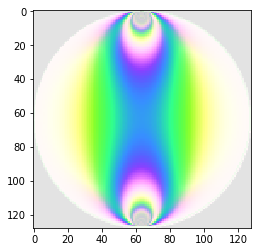

In [42]:
plt.imshow(img, cmap='gray')

In [ ]:
img.shape

In [ ]:
X_train[0]

In [ ]:
f.close()

In [ ]:
import h5py
f = h5py.File("ensayo5.hdf5", mode='w')
f.create_dataset("S_train", (1, 128, 128, 4))


In [ ]:
stack = np.load(X_train[67317])
img = cv2.resize(stack, (128, 128), interpolation=cv2.INTER_AREA)
f["S_train"][0, ...] = img

In [ ]:
hf = h5py.File('ensayo5.hdf5', 'r')

In [ ]:
n1 = hf.get('S_train')
n1

In [ ]:
n1 = np.array(n1)
n1.shape

In [ ]:
n1[0,:,:,:].shape

In [ ]:
import numpy as np

S_train = []
i= 1

for path in X_train.values:
    stack = np.load(path)
    S_train.append(stack)
    print('\r' + str(i), end='')
    i += 1
    
S_train = np.array(S_train)

In [ ]:
S_train.shape

In [ ]:
np.save('/Coleccion/NumpyArrays/S_train', S_train)

## Validación

In [ ]:
S_test = []
i= 1

for path in X_test.values:
    stack = np.load(path)
    S_test.append(stack)
    print('\r' + str(i), end='')
    i += 1
    
S_test = np.array(S_test)

In [ ]:
stack = np.loadtxt(y_train.values[0])

In [ ]:
stack.shape

In [ ]:
plt.imshow(stack, cmap='gray')

In [ ]:
stack.shape

In [ ]:
S_test = []
S_test.append(stack)
S_test = np.array(S_test)

In [ ]:
np.savetxt('S_test.txt', S_test[0,:,:,0])

In [ ]:
S_test.shape

In [ ]:
np.save('S_test', S_test)

In [ ]:
a1 = np.loadtxt('S_test.txt')
a1.shape

In [ ]:
Matrix = np.load(X_train.values[1])
Matrix.shape

In [ ]:
plt.imshow(Matrix)

In [ ]:
f = open('S_test.txt', 'a')
f.write(str(S_test[0,:,:,1]))
f.close()

In [ ]:
a2 = np.load('S_test.npy')
a2.shape

In [ ]:
plt.imshow(a2[0,:,:,:])

In [ ]:
from pathlib import Path

In [ ]:
p = Path('S_test.npy')

with p.open('ab') as f:
    np.save(f, Matrix)